# LOGISTIC REGRESSION

#### LOAD THE DEPENDANCIES

In [90]:
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import set_printoptions

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os
import sys
sys.path.insert(0, "C:\\Users\\Crystal\\Desktop\\Programs\\my-modules-and-libraries")

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from scipy import stats
import seaborn as sns
import math



In [91]:
#### KNN Classifier

def logistic_regression(X_train,y_train,X_test,y_test):
    """Logistic Regression algorithm"""
    global classifier
    
    f1_scores=[]
    accur=[]
    preci=[]
    recall=[]
    
        
    # Define Logistic Regression Model
    classifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                    C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
                                    random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
                                    verbose=0, warm_start=False, n_jobs=None)

    # Fit Model
    classifier.fit(X_train,y_train)

    y_pred=classifier.predict(X_test)

    y_prob=classifier.predict_proba(X_test)

    y_prob=y_prob[:,1]

    f1,a,p,r=metrics(y_test, y_pred)

    f1_scores.append(f1)
    accur.append(a)
    preci.append(p)
    recall.append(r)
        
    print('\n','f1_scores: ',f1_scores)
    print('accuracy: ',accur)
    
    return f1_scores,accur,preci,recall,y_pred,y_prob
        
        

In [92]:
#### Evaluate Model

def metrics(y_test, y_pred):
    """Confusion matrix and associated metrics"""
    matrix = confusion_matrix(y_test, y_pred)
    tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
    precision=precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accuracy=accuracy_score(y_test,y_pred)
    print('Confusion matrix breakdown:',('tn:',tn,'fp:',fp,'fn:',fn,'tp:',tp),'\n')
    print('Confusion matrix:\n', matrix)
    print('Precision: When it predicts yes, how often is it correct?:',precision)
    print('Recall.True Positive Rate: When it\'s actually yes, how often does it predict yes?:',recall)
    print('F1:score is the harmonic average of the precision and recall,:',f1)
    print('Accuracy.Overall, how often is the classifier correct?: ',accuracy)
    print('Misclassification Rate.Overall, how often is it wrong?: ',(1-accuracy))

    return (f1,accuracy,precision,recall)
    


#### PREPROCESSING: Replacing zeros where it is not a valid value for that feature.
##### This done here by replacing the zero values with a NAN, then replacing the NAN with the average value for non-zero values in that column

In [93]:
def replacing_zeros(dataset,the_headers):
    """Function used to remove zeros from numeric features when 0 is not practical"""

    for header in the_headers:
        dataset[header]=dataset[header].replace(0,np.nan)
        mean=int(dataset[header].mean(skipna=True))
        dataset[header]=dataset[header].replace(np.nan,mean)
        
    return dataset


#### PREPROCESSING: Split the dataset

In [94]:
def split_the_dataset(dataset,input_headers,target_header):
    
#     X=dataset.iloc[:,0,8]
#     X=dataset.iloc[:,[1,2,4,5,6,7]]
#     y=dataset.iloc[:,8]
    X=dataset[input_headers]
    y=dataset[target_header]
    
    X.head()
    
    return X,y

#### PREPROCESSING: Quick look at the features

In [95]:
def quick_feature_view(X):
    

    # X.hist(bins=50,figsize=(15,15))
    # X.plot(kind='hist',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))

    headers=X.columns.tolist()
    fig, axes = plt.subplots(nrows=1, ncols=len(headers), figsize=(20, 10))
    print(headers)
    for i,head in enumerate(headers,0):

        axes[i].hist(x=X[head],bins=50,edgecolor='black')
        axes[i].set(title=head)
        axes[i].grid()

    plt.show()

    X.plot(kind='density',subplots=True,layout=(3,3),sharex=False, figsize=(15,15))
    plt.show()

#### PREPROCESSING:Target Summary

In [96]:
def target_summary(dataset,target_header):
    """PREPROCESSING:Target Summary"""
    print(dataset.groupby(target_header).size())
    print((dataset.groupby(target_header).size()/len(y)*100))


#### PREPROCESSING:Train - Test Split of the data

In [97]:
def split_the_train_test_data(X,y):
    
    """PREPROCESSING:Train - Test Split of the data"""
    X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=.30,random_state=42,shuffle=True)
    X_train.head()
    
    return X_train,X_test,y_train,y_test

#### PREPROCESSING: Feature Scaling

In [98]:
def feature_scaling(X_train,X_test):
    sc_X=StandardScaler()
    X_train=sc_X.fit_transform(X=X_train,y=None)
    X_test=sc_X.fit_transform(X=X_test,y=None)

    print(sc_X.fit(X_train))
    print(X_train[0:5])
    
    return X_train, X_test



In [99]:
def plot_the_metrics(f1_scores,accur,preci,recall):

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10),sharex='none')
    axes[0,0].plot(k,f1_scores,marker='o')
    axes[0,1].plot(k,accur,marker='o')
    axes[0,0].set(title='F1 Score')
    axes[0,1].set(title='Accuracy')
    axes[0,0].set(xlabel='K value')
    axes[0,1].set(xlabel='K value')
#     axes[0,0].set(xlim=(3,21), ylim=(0,1))
#     axes[0,1].set(xlim=(3,21), ylim=(0,1))
    axes[0,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[0,0].grid()
    axes[0,1].grid()

    axes[1,0].plot(k,preci,marker='o')
    axes[1,1].plot(k,recall,marker='o')
    axes[1,0].set(title='Precision')
    axes[1,1].set(title='Recall')
    axes[1,0].set(xlabel='K value')
    axes[1,1].set(xlabel='K value')
#     axes[1,0].set(xlim=(3,21), ylim=(0,1))
#     axes[1,1].set(xlim=(3,21), ylim=(0,1))
    axes[1,0].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,1].set(xticks=range(3,23,2),yticks=np.arange(0,1.1,.1))
    axes[1,0].grid()
    axes[1,1].grid()

    plt.show()

In [100]:
def box_plot_the_metrics(f1_scores,accur,preci,recall):
    """Box plots for the classification metrics over a range of parameter adjustments"""
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    axes.boxplot([f,a,p,r])
    axes.set_xticklabels(['f1_score','accuracy','precision','recall'])
    plt.grid()
    
    plt.show()
    

In [101]:
def plot_of_data_space(data,labels,input_headers):
    
    
    xx_1=pd.DataFrame(data[:,0]) 
    xx_2=pd.DataFrame(data[:,1]) 
    y=pd.DataFrame(labels)

#     print(xx_1.head(),'\n',xx_2.head(),'\n',y.head())
#     print(list(xx_1[y==0]))
#     print(list(xx_1[y==1]))
    plt.figure(figsize=(15,10)) 
    b=plt.scatter(xx_1[y==0],xx_2[y==0],color='b') 
    r=plt.scatter(xx_1[y==1],xx_2[y==1],color='r')

#     plt.scatter(data[:,0],data[:,1],s=40,c=labels,cmap=plt.cm.Spectral)
#     plt.scatter(x_test[:,0],x_test[:,1],color='black')

    plt.xlabel(input_headers[0])
    plt.ylabel(input_headers[1])
#     plt.xlim(xx_1.min(),xx_1.max())
#     plt.ylim(xx_2.min(),xx_2.max())
    plt.grid()
    plt.legend((b,r),tuple(np.unique(labels)))
    plt.show()


In [102]:
def boundary_decision_plot(X,y,X_train,y_train,x_test,y_pred,y_prob):
    
    X_unscaled=X.values
    X_scaled, dummy=feature_scaling(X_unscaled,X_test=1)
    xx_1=pd.DataFrame(X_train[:,0]) 
    xx_2=pd.DataFrame(X_train[:,1]) 
    y=pd.DataFrame(y_train.values)
    
#     print(y_train[0:5])
#     print(X_train[0:5])

    xx_test_1=pd.DataFrame(x_test[:,0]) 
    xx_test_2=pd.DataFrame(x_test[:,1])

    y_predict=pd.DataFrame(y_pred) 
    y_prob=pd.DataFrame(y_prob) 

    cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])

#     cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_bold = ListedColormap(['#FF0000','#0000FF'])

    h=.02

#     Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
#     x1=X_train[:,0] 
    x1=X_scaled[:,0]
    x2=X_scaled[:,1] 
    x_min,x_max = x1.min()-1,x1.max()+1 
    y_min,y_max = x2.min()-1,x2.max()+1 
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


    the_predict=classifier.predict(np.c_[xx.ravel(),yy.ravel()])

#     Put the result into a color plot
    Z = the_predict.reshape(xx.shape) 
    plt.figure(figsize=(15,15)) 
    plt.xlim(xx.min(),xx.max()) 
    plt.ylim(yy.min(),yy.max())

    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

#     plt.scatter(xx_1[y==0],xx_2[y==0],color='b',marker='o') 
#     plt.scatter(xx_1[y==1],xx_2[y==1],color='r',marker='o')
    

#     plt.scatter(X_train[:,0],X_train[:,1],s=40,c=y_train,cmap=plt.cm.Spectral)
    cm=plt.cm.get_cmap('RdYlBu_r')

#     plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
#     plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_predict,marker='D') 
    plt.scatter(xx_test_1[y_predict==0],xx_test_2[y_predict==0],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.scatter(xx_test_1[y_predict==1],xx_test_2[y_predict==1],cmap=cm,vmin=0,vmax=1,c=y_prob,marker='D') 
    plt.colorbar()


    plt.grid() 
    plt.show()


In [103]:
def max_results(f1_scores,accur,preci,recall):
    
    f=np.asarray(f1_scores)
    a=np.asarray(accur)
    p=np.asarray(preci)
    r=np.asarray(recall)
    
    
    results=f"""\n
    The max F1 SCORE is {f.max()} 
    The max ACCURACY is {a.max()} 
    The max PRECISION is {p.max()} 
    The max RECALL is {r.max()} 
    """
    
    print(results)
    
    
    
    
    

# MAIN PROGRAM

In [104]:
if __name__ == "__main__":
    
    global classifier
    
#     RETRIEVE THE DATASET
    
    location=r'C:/Users/Crystal/Desktop/Programs/dataset_repo/titan/titantic_1.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\diabetes.csv'
#     location=r'C:\Users\Crystal\Desktop\Programs\dataset_repo\CDH_Train.csv'
    dataset=pd.read_csv(location)

    print(dataset.info())
    dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [105]:
    # Replace zeros with the mean where needed.
    rz=input('Do you need to replace any zeros in the dataset?')
    if (rz.lower()=='y'):
        the_headers=['Age']
        dataset=replacing_zeros(dataset,the_headers)
        dataset.head()

Do you need to replace any zeros in the dataset?y


### Selecting inputs and targets

In [106]:
    #Selecting inputs and targets
    
    target_header=['Survived']
    input_headers=['Parch','Fare','SibSp','Age','Pclass']
    
    X,y=split_the_dataset(dataset,input_headers,target_header)
    if (X.values.shape[1]==2):
        plot_of_data_space(X.values,y.values,input_headers)
        
    print(X.head())

   Parch    Fare  SibSp   Age  Pclass
0      0   7.250      1  22.0       3
1      0  71.283      1  38.0       1
2      0   7.925      0  26.0       3
3      0  53.100      1  35.0       1
4      0   8.050      0  35.0       3


In [107]:
    #Splitting the Train-Test data
    X_train,X_test,y_train,y_test=split_the_train_test_data(X,y)

    

In [108]:
    #Scale the data    
    X_train, X_test=feature_scaling(X_train,X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 1.99885349  0.98099249 -0.47416141 -1.93637586 -1.63788124]
 [-0.47932706 -0.4696298  -0.47416141 -0.01577421  0.80326712]
 [ 0.75976322 -0.40614228  0.34868694 -2.16684805  0.80326712]
 [ 1.99885349 -0.0802318   0.34868694  0.52199425 -0.41730706]
 [ 0.75976322 -0.10965142  0.34868694  1.05976271 -0.41730706]]


In [109]:
    #Call the Logistic Regression function
    f1_scores,accur,preci,recall,y_pred,y_prob=logistic_regression(X_train,y_train,X_test,y_test)
    print(y_pred)
    print(y_prob)

Confusion matrix breakdown: ('tn:', 145, 'fp:', 12, 'fn:', 60, 'tp:', 51) 

Confusion matrix:
 [[145  12]
 [ 60  51]]
Precision: When it predicts yes, how often is it correct?: 0.8095238095238095
Recall.True Positive Rate: When it's actually yes, how often does it predict yes?: 0.4594594594594595
F1:score is the harmonic average of the precision and recall,: 0.5862068965517242
Accuracy.Overall, how often is the classifier correct?:  0.7313432835820896
Misclassification Rate.Overall, how often is it wrong?:  0.26865671641791045

 f1_scores:  [0.5862068965517242]
accuracy:  [0.7313432835820896]
[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 

C:\Users\Public\Programming\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Public\Programming\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = None.
  " = {}.".format(self.n_jobs))


In [110]:
    #Plot the metrics
#     plot_the_metrics(f1_scores,accur,preci,recall)
    

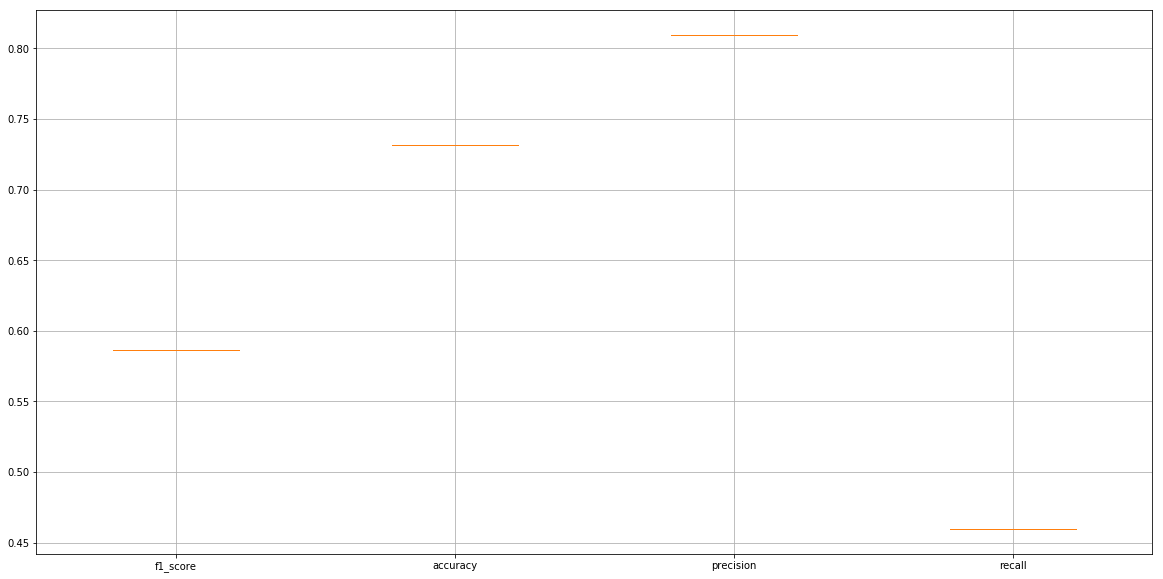

In [111]:
    #Box plot of the metrics
    box_plot_the_metrics(f1_scores,accur,preci,recall)

In [112]:
    max_results(f1_scores,accur,preci,recall)



    The max F1 SCORE is 0.5862068965517242 
    The max ACCURACY is 0.7313432835820896 
    The max PRECISION is 0.8095238095238095 
    The max RECALL is 0.4594594594594595 
    


In [113]:
    #Plot the decision boundaries (for input vectors only)
    
    if (X.values.shape[1]==2):
        boundary_decision_plot(X,y,X_train,y_train,X_test,y_pred,y_prob)